In [30]:
import os
os.chdir('C:/Users/HP/Desktop/Datasets')
os.getcwd()

'C:\\Users\\HP\\Desktop\\Datasets'

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#import seaborn as sns

df = pd.read_csv('DelayedFlights.csv')
print(df.head())

   Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4     2003        1955   
1           1  2008      1           3          4      754         735   
2           2  2008      1           3          4      628         620   
3           4  2008      1           3          4     1829        1755   
4           5  2008      1           3          4     1940        1915   

   ArrTime  CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  \
0   2211.0        2225            WN  ...     4.0       8          0   
1   1002.0        1000            WN  ...     5.0      10          0   
2    804.0         750            WN  ...     3.0      17          0   
3   1959.0        1925            WN  ...     3.0      10          0   
4   2121.0        2110            WN  ...     4.0      10          0   

   CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
0                 N         0           NaN         

In [32]:
df.apply(lambda x:sum(x.isnull()),axis = 0)

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                3896
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   4
ActualElapsedTime      3896
CRSElapsedTime          157
AirTime                3896
ArrDelay               3896
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 3896
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         362841
WeatherDelay         362841
NASDelay             362841
SecurityDelay        362841
LateAircraftDelay    362841
dtype: int64

In [33]:
df.dtypes

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime                int64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay               int64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut                int64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [34]:
df['ArrTime'].fillna(df['ArrTime'].mean(),inplace = True)
df.apply(lambda x: sum(x.isnull()),axis = 0)

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   4
ActualElapsedTime      3896
CRSElapsedTime          157
AirTime                3896
ArrDelay               3896
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 3896
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         362841
WeatherDelay         362841
NASDelay             362841
SecurityDelay        362841
LateAircraftDelay    362841
dtype: int64

In [35]:
df['ActualElapsedTime'].fillna(df['ActualElapsedTime'].mean(),inplace = True)
df['CRSElapsedTime'].fillna(df['ActualElapsedTime'].mean(),inplace = True)
df['AirTime'].fillna(df['AirTime'].mean(),inplace = True)
df['ArrDelay'].fillna(df['ArrDelay'].mean(),inplace = True)
df['TaxiIn'].fillna(df['TaxiIn'].mean(),inplace = True)
df.apply(lambda x: sum(x.isnull()),axis = 0)

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   4
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         362841
WeatherDelay         362841
NASDelay             362841
SecurityDelay        362841
LateAircraftDelay    362841
dtype: int64

In [36]:
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003,1955,2211.0,2225,WN,...,4.0,8,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754,735,1002.0,1000,WN,...,5.0,10,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628,620,804.0,750,WN,...,3.0,17,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829,1755,1959.0,1925,WN,...,3.0,10,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940,1915,2121.0,2110,WN,...,4.0,10,0,N,0,NaN,NaN,NaN,NaN,NaN
5,6,2008,1,3,4,1937,1830,2037.0,1940,WN,...,3.0,7,0,N,0,10.0,0.0,0.0,0.0,47.0
6,10,2008,1,3,4,706,700,916.0,915,WN,...,5.0,19,0,N,0,NaN,NaN,NaN,NaN,NaN
7,11,2008,1,3,4,1644,1510,1845.0,1725,WN,...,6.0,8,0,N,0,8.0,0.0,0.0,0.0,72.0
8,15,2008,1,3,4,1029,1020,1021.0,1010,WN,...,6.0,9,0,N,0,NaN,NaN,NaN,NaN,NaN
9,16,2008,1,3,4,1452,1425,1640.0,1625,WN,...,7.0,8,0,N,0,3.0,0.0,0.0,0.0,12.0


In [37]:
df.corr()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Unnamed: 0,1.000000,NaN,0.985386,0.015790,0.021755,0.020686,0.027435,2.833623e-03,0.023048,-0.025390,...,0.029773,1.013372e-02,0.021345,NaN,3.227477e-04,0.000123,-0.003252,0.023450,-0.005175,-0.015905
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,0.985386,NaN,1.000000,0.020957,0.022139,0.025462,0.031677,5.400018e-03,0.023018,0.003662,...,-0.008466,-2.088909e-02,-0.009624,NaN,-8.691968e-05,-0.006065,-0.002643,0.011958,-0.003000,-0.009964
DayofMonth,0.015790,NaN,0.020957,1.000000,-0.021198,0.011964,0.012325,8.352520e-03,0.010266,-0.001148,...,-0.000555,-1.608772e-02,-0.002460,NaN,-4.738684e-03,-0.005660,-0.006945,0.013732,-0.003534,-0.003010
DayOfWeek,0.021755,NaN,0.022139,-0.021198,1.000000,0.018711,0.026140,1.033215e-02,0.014525,-0.013528,...,0.012396,7.193510e-03,-0.020000,NaN,-8.881828e-04,0.014814,-0.000672,-0.029863,0.008237,0.000107
DepTime,0.020686,NaN,0.025462,0.011964,0.018711,1.000000,0.884626,4.614351e-01,0.717095,-0.026200,...,-0.054752,-1.248042e-02,0.017966,NaN,-6.940840e-03,-0.051228,0.008105,0.016810,-0.013952,0.180777
CRSDepTime,0.027435,NaN,0.031677,0.012325,0.026140,0.884626,1.000000,4.009872e-01,0.710719,-0.057713,...,-0.026591,-3.085971e-02,-0.001383,NaN,-1.150848e-02,-0.107541,-0.012709,-0.038615,-0.015122,0.169760
ArrTime,0.002834,NaN,0.005400,0.008353,0.010332,0.461435,0.400987,1.000000e+00,0.625257,-0.011729,...,-0.030323,3.825041e-02,0.005180,NaN,8.970088e-18,-0.082601,-0.023285,0.035010,-0.007901,-0.030509
CRSArrTime,0.023048,NaN,0.023018,0.010266,0.014525,0.717095,0.710719,6.252566e-01,1.000000,-0.055968,...,0.018461,1.199496e-02,0.025795,NaN,-1.831076e-03,-0.096991,-0.007393,0.000778,-0.011501,0.137884
FlightNum,-0.025390,NaN,0.003662,-0.001148,-0.013528,-0.026200,-0.057713,-1.172911e-02,-0.055968,1.000000,...,-0.354759,4.697287e-03,0.032280,NaN,-2.201570e-03,0.068379,0.070962,0.022110,-0.002424,-0.058359


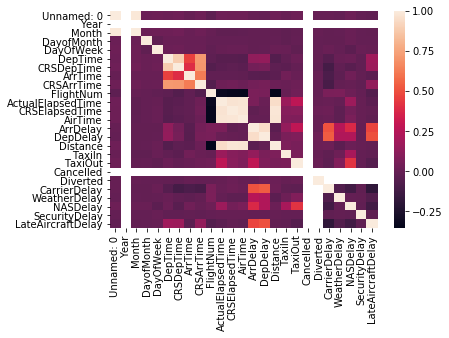

In [38]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr,xticklabels = corr.columns,yticklabels = corr.columns)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

X = df['CRSArrTime'].values
y = df['ArrTime'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)
model = LinearRegression()
X_train = X_train.reshape(-1,1)
model.fit(X_train,y_train)
X_test = X_test.reshape(-1,1)
y_pred = model.predict(X_test)
print(y_pred)

[1025.73965801 1736.89542418  878.95828213 ... 2136.87467347 1757.44481681
 1770.65514064]


In [48]:
rmse_train = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))
r2_training = r2_score(y_train,model.predict(X_train))
rmse_testing = np.sqrt(mean_squared_error(y_test,y_pred))
r2_testing = r2_score(y_test,y_pred)
print(rmse_train,r2_training,rmse_testing,r2_testing)

426.1227307586243 0.3909420492715049 426.8919101989119 0.3909529988497277


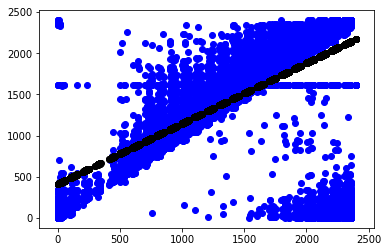

In [49]:
import matplotlib.pyplot as plt
plt.scatter(X_test,y_test,color = 'b',marker = 'o')
plt.scatter(X_test,y_pred,color = 'k',marker = 'o')
plt.show()

In [50]:
model.score(X_train,y_train)

0.3909420492715049